## 01 Ridership Time Series Forecasting
This notebook uses machine learning time series analysis to forecast demand for the Boston Bluebikes bikeshare system.

### Notebook Objectives
1. Process zip files to extract all trip data from 2015 to present
2. Pickle the processed trips dataframe for future operations
3. Use ML time series techniques to model the drift, seasonality, and residual noise

In [123]:
from pathlib import Path
from zipfile import ZipFile
import pandas as pd
import logging
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

logging.basicConfig(filename='preprocess.log', filemode='w', 
        level=logging.DEBUG, force=True,
        format='%(asctime)s %(levelname)s:%(message)s')

In [36]:
# Extract trips data from https://s3.amazonaws.com/hubway-data/index.html
for path in Path('../data/').glob('*.zip'):
    with ZipFile(path, mode="r") as z:
        z.extractall(Path('../data/extracted/'))

In [37]:
# Generate dataframe with trips data
trips = pd.DataFrame()
for path in Path('../data/extracted/').glob('*.csv'):
    logging.info(f'Processing {path}')
    trips = pd.concat([trips, pd.read_csv(path)])

# Pickle results
trips.to_pickle(Path('../assets/trips_df.pkl'))

In [47]:
# Load pickled dataframe (2.6 GB! Lots of data here)
trips = pd.read_pickle(Path('../assets/trips_df.pkl'))

In [51]:
# Inspect data (Over 16 million observations!)
print(f'Shape: {trips.shape}')

Shape: (16868559, 16)


In [57]:
# Inspect columns and datatypes
trips.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id              object
end station name            object
end station latitude        object
end station longitude       object
bikeid                       int64
usertype                    object
postal code                 object
birth year                  object
gender                     float64
dtype: object

In [59]:
# Convert to datetime
trips['starttime'] = pd.to_datetime(trips['starttime'], format='%Y-%m-%d')
trips['stoptime'] = pd.to_datetime(trips['stoptime'], format='%Y-%m-%d')

In [131]:
# Get daily trip counts
trips_daily = trips.groupby(by=[trips['starttime'].dt.date], 
                             as_index=True).agg(count=('tripduration', 'count'))
trips_daily.index = pd.Index(trips_daily.index).rename('date')

In [132]:
# Inspect number of observations post groupby
print(trips_daily.shape)
trips_daily.head()

(2947, 1)


,count
date,
2015-01-01,127
2015-01-02,213
2015-01-03,142
2015-01-04,112
2015-01-05,337


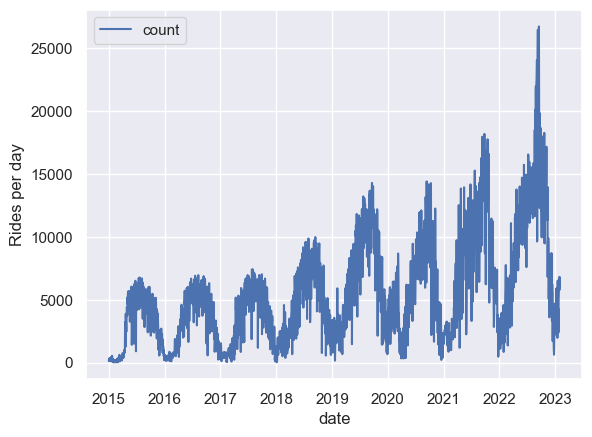

In [128]:
trips_daily.plot()
plt.ylabel('Rides per day');